<a href="https://colab.research.google.com/github/vasiliyeskin/MachineLearningExperiences/blob/master/Deep-Reinforcement-Learning-Hands-On/Chapter06/03_dqn_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pong - DQN-обучение**


Уставновка tensorboardX

In [ ]:
!pip install tensorboardX

In [ ]:
!mkdir lib
!wget https://github.com/vasiliyeskin/MachineLearningExperiences/raw/master/Deep-Reinforcement-Learning-Hands-On/Chapter06/lib/__init__.py -O lib/__init__.py
!wget https://github.com/vasiliyeskin/MachineLearningExperiences/raw/master/Deep-Reinforcement-Learning-Hands-On/Chapter06/lib/dqn_model.py -O lib/dqn_model.py
!wget https://github.com/vasiliyeskin/MachineLearningExperiences/raw/master/Deep-Reinforcement-Learning-Hands-On/Chapter06/lib/wrappers.py -O lib/wrappers.py

In [ ]:
!wget https://github.com/vasiliyeskin/MachineLearningExperiences/raw/master/Deep-Reinforcement-Learning-Hands-On/Chapter06/PongNoFrameskip-v4-best_saved.dat -O PongNoFrameskip-v4-best.dat

In [ ]:
# install required system dependencies
!apt-get install -y xvfb x11-utils
# install required python dependencies (might need to install additional gym extras depending)
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

In [14]:
!echo $DISPLAY
import pyvirtualdisplay

_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(1400, 900))
_ = _display.start()
!echo $DISPLAY

:1001
:1005


KeyboardInterrupt: ignored

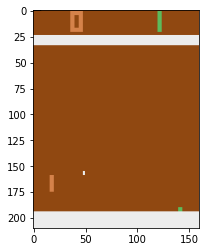

In [23]:
#!/usr/bin/env python3
import gym
import time
import argparse
import numpy as np

import torch

from lib import wrappers
from lib import dqn_model

import collections

from IPython import display
import matplotlib.pyplot as plt

DEFAULT_ENV_NAME = "PongNoFrameskip-v4"
FPS = 25


if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    # parser.add_argument("-m", "--model", required=True, help="Model file to load")
    # parser.add_argument("-e", "--env", default=DEFAULT_ENV_NAME,
                        # help="Environment name to use, default=" + DEFAULT_ENV_NAME)
    # parser.add_argument("-r", "--record", help="Directory to store video recording")
    # parser.add_argument("--no-visualize", default=True, action='store_false', dest='visualize',
                        # help="Disable visualization of the game play")
    # args = parser.parse_args()

    env = wrappers.make_env(DEFAULT_ENV_NAME)
    # if args.record:
    env = gym.wrappers.Monitor(env, "recording", force=True)
    net = dqn_model.DQN(env.observation_space.shape, env.action_space.n)
    net.load_state_dict(torch.load(DEFAULT_ENV_NAME + '-best.dat', map_location=lambda storage, loc: storage))

    state = env.reset()
    total_reward = 0.0
    c = collections.Counter()

    while True:
        start_ts = time.time()
        # if args.visualize:
        #    env.render(mode='rgb_array')
        plt.imshow(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state_v = torch.tensor(np.array([state], copy=False))
        q_vals = net(state_v).data.numpy()[0]
        action = np.argmax(q_vals)
        c[action] += 1
        state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break
        # if args.visualize:
        delta = 1/FPS - (time.time() - start_ts)
        if delta > 0:
            time.sleep(delta)
    print("Total reward: %.2f" % total_reward)
    print("Action counts:", c)
    # if args.record:
    env.env.close()